# Setting up the Environment 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/monik/Downloads/Mall-Customer-Segmentation-main/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

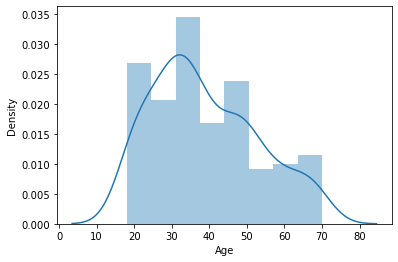

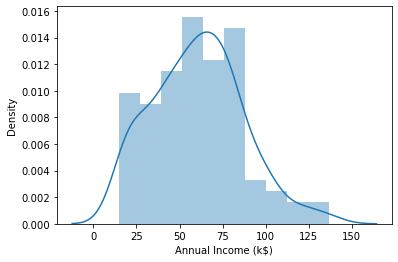

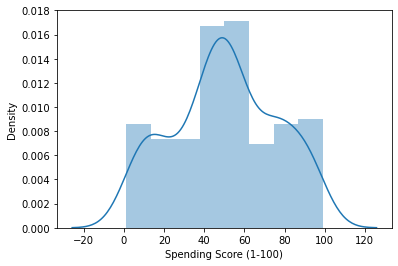

In [6]:
columns= ['Age', 'Annual Income (k$)' ,'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(df[i])
    

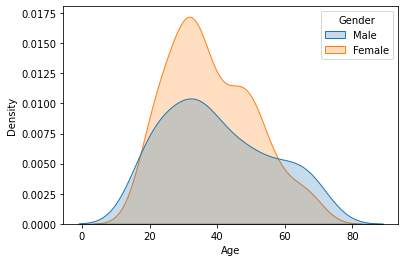

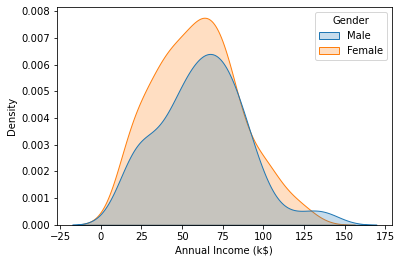

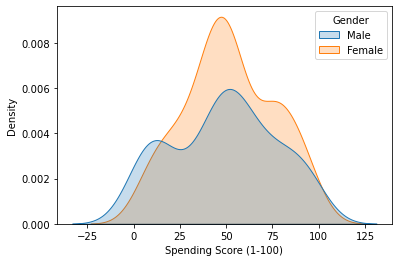

In [7]:
columns= ['Age', 'Annual Income (k$)' ,'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

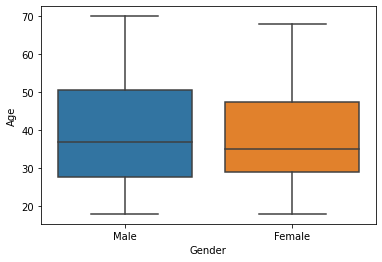

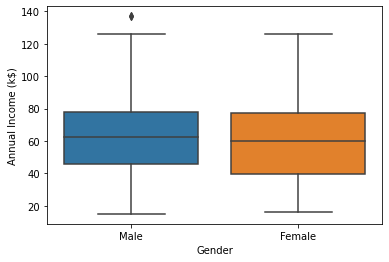

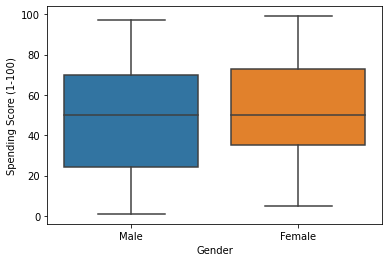

In [8]:
columns= ['Age', 'Annual Income (k$)' ,'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [9]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

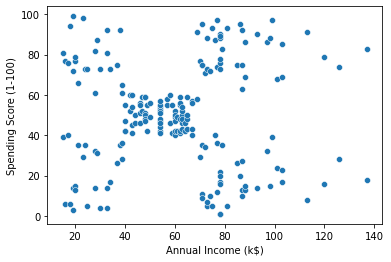

In [10]:
sns.scatterplot(data=df, x='Annual Income (k$)' , y='Spending Score (1-100)')

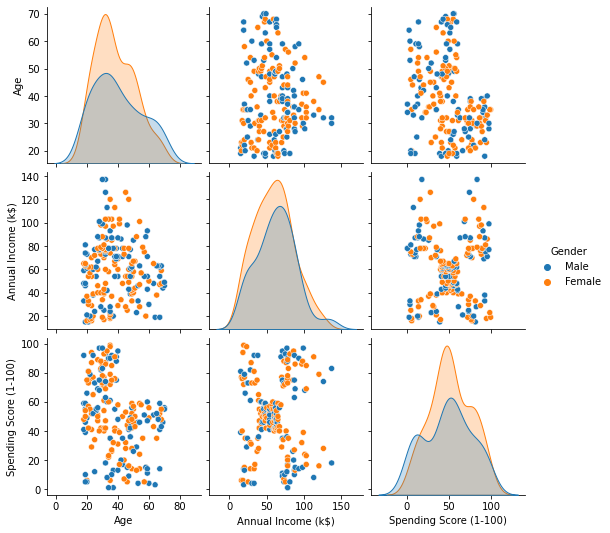

In [11]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df, hue='Gender')

In [12]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)' ,'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

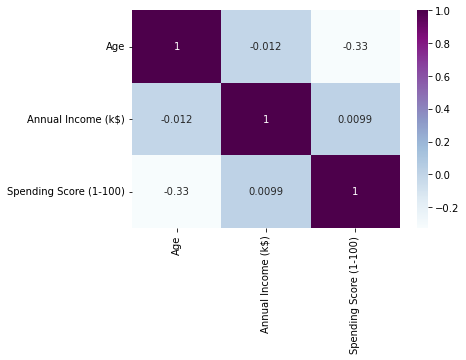

In [14]:
sns.heatmap(df.corr(),annot=True , cmap="BuPu")

# Clustering - Univariate, Bivariate,   Multivariate

In [27]:
c1 = KMeans(n_clusters=3)

In [28]:
c1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [29]:
c1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [30]:
df['Income Cluster']=c1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [31]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [32]:
c1.inertia_

23517.33093093092

In [33]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [34]:
intertia_scores

[137277.2800000002,
 48660.88888888887,
 24361.259213759215,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3955.2566544566516,
 2862.8330280830287,
 2168.478715728716,
 1770.6341269841287]

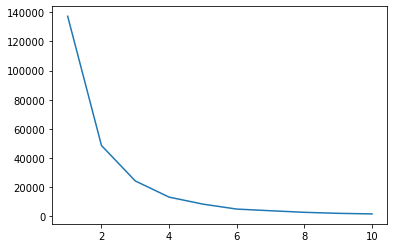

In [36]:
plt.plot(range(1,11),intertia_scores);

In [38]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [43]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)' ].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [42]:
#Bivariate Clustering


In [49]:
c2 = KMeans(n_clusters=5)
c2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=c2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


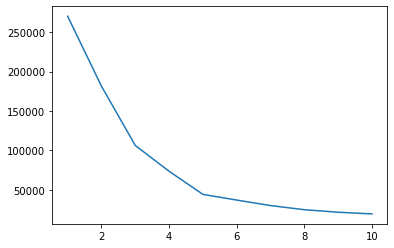

In [50]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2);

In [62]:
centers = pd.DataFrame(c2.cluster_centers_)
centers.columns=['x','y']


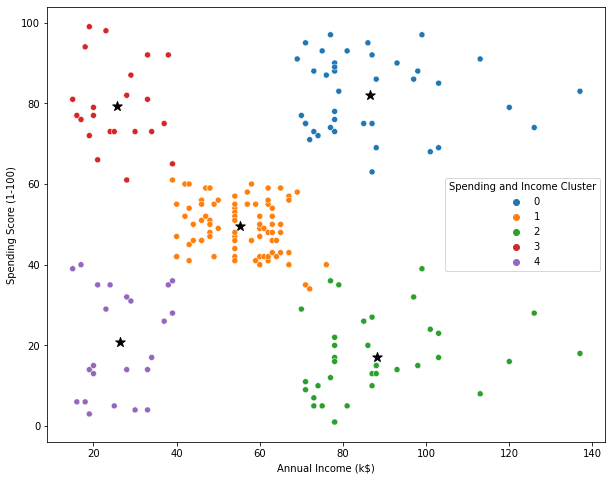

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'] ,y=centers['y'] , s=100 , c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)' , y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10');

In [66]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [67]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)' ].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [68]:
#multivariate clustering 

from sklearn.preprocessing import StandardScaler

In [69]:
scale = StandardScaler()

In [70]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


In [71]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,3,1
2,20,16,6,1,4,0
3,23,16,77,1,3,0
4,31,17,40,1,4,0


In [72]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [73]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [78]:
dff = scale.fit_transform(dff)

In [79]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


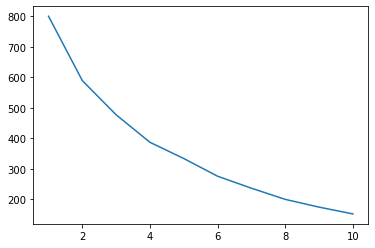

In [80]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [81]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,0,0
196,Female,45,126,28,0,2
197,Male,32,126,74,0,0
198,Male,32,137,18,0,2


In [83]:
df.to_csv('Clustering.csv')